In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

df = pd.read_csv("ds_salaries0.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#  Understand the Data

In [2]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [5]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [6]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [7]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [8]:
df = df.drop(columns=['salary', 'salary_currency'])
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S


## Turn Categorical values into numerical

In [9]:
#Encoding the string columns to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['job_title'] = le.fit_transform(df['job_title'])
df['employee_residence'] = le.fit_transform(df['employee_residence'])
df['company_location'] = le.fit_transform(df['company_location'])
df['company_size'] = le.fit_transform(df['company_size'])


In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,85847,26,100,25,0
1,2023,2,0,66,30000,75,100,70,2
2,2023,2,0,66,25500,75,100,70,2
3,2023,3,2,47,175000,11,100,12,1
4,2023,3,2,47,120000,11,100,12,1


In [11]:
df.describe()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,2.469241,1.996538,39.661784,137570.389880,66.149401,46.271638,62.117177,0.918509
std,0.691448,0.906261,0.133550,18.536695,63055.625278,19.235212,48.589050,17.495432,0.392071
min,2020.000000,0.000000,0.000000,0.000000,5132.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,2.000000,27.000000,95000.000000,75.000000,0.000000,70.000000,1.000000
50%,2022.000000,3.000000,2.000000,33.000000,135000.000000,75.000000,0.000000,70.000000,1.000000
75%,2023.000000,3.000000,2.000000,47.000000,175000.000000,75.000000,100.000000,70.000000,1.000000
max,2023.000000,3.000000,3.000000,92.000000,450000.000000,77.000000,100.000000,71.000000,2.000000


## assign values for x and y 

In [12]:
x = df.drop('salary_in_usd', axis=1).values
y = df['salary_in_usd'].values

x[0:1]


array([[2023,    3,    2,   84,   26,  100,   25,    0]], dtype=int64)

# Normalize the data

In [13]:
#normalizing the data
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)

x[0:1]

array([[ 0.90599446,  0.58573566,  0.02592668,  2.39223443, -2.08756459,
         1.10591825, -2.12181783, -2.34302199]])

## See Correlation

In [14]:
# Calculate the correlation matrix between x_standardized and y
correlation_matrix = np.corrcoef(df.T, y)

# Extract the correlation between each feature and the target variable
feature_target_correlation = correlation_matrix[:-1, -1]

# Display the correlation values
for feature, correlation in zip(df.columns, feature_target_correlation):
    print(f'Correlation between {feature} and target variable: {correlation}')


Correlation between work_year and target variable: 0.22829002243287855
Correlation between experience_level and target variable: 0.32717275721326394
Correlation between employment_type and target variable: -0.010328990568078917
Correlation between job_title and target variable: 0.12087494588537902
Correlation between salary_in_usd and target variable: 1.0
Correlation between employee_residence and target variable: 0.41403852153660453
Correlation between remote_ratio and target variable: -0.06417098519057554
Correlation between company_location and target variable: 0.4051833800569487
Correlation between company_size and target variable: -0.0003723590888333255


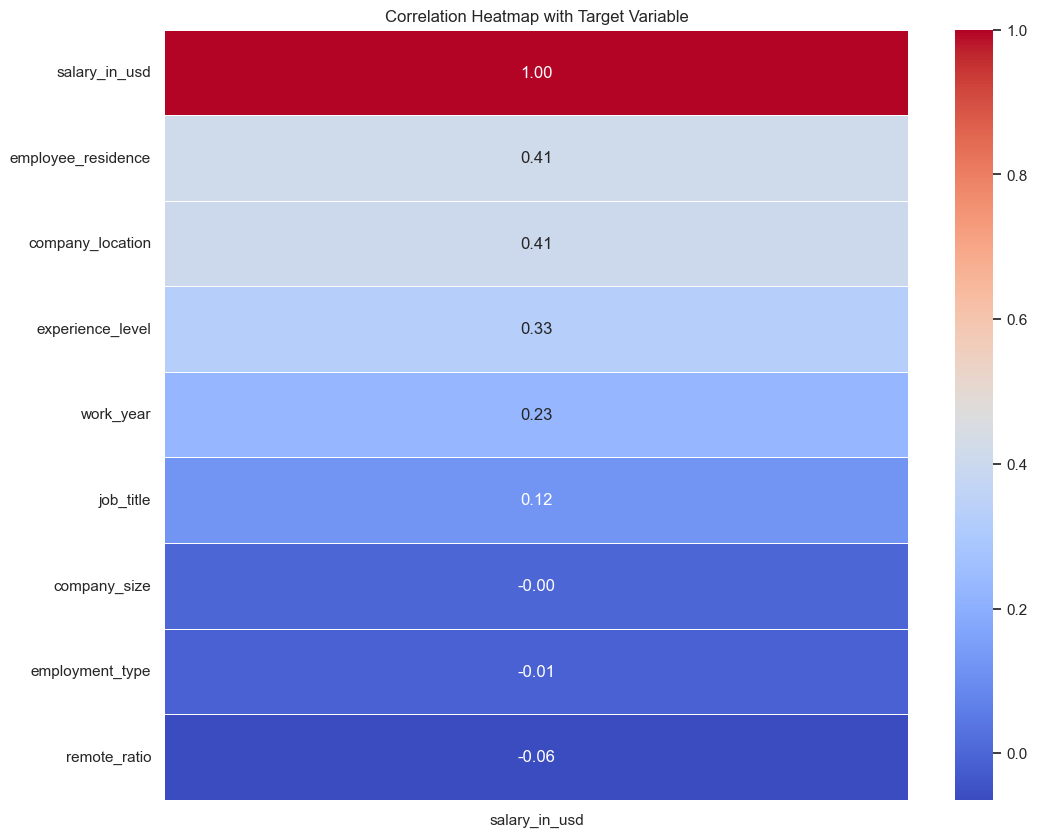

In [15]:
# Assuming df is your DataFrame with normalized features and target
sns.set(style="white")
plt.figure(figsize=(12, 10))

# Include the correlation of features with the target variable
correlation_matrix = df.corr()
target_correlation = correlation_matrix['salary_in_usd'].sort_values(ascending=False)

# Create a heatmap
sns.heatmap(target_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Heatmap with Target Variable")
plt.show()


# We can see that company_size, employment_type and remote_ratio does not have strong correlation with salary.

## Split the data, train the model

In [16]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

## Linear Regression

In [17]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#fitting the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model using Mean Squared Error
lr_mse = mean_squared_error(y_test, y_pred)

lr_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: " + str(lr_mse))
print("R-squared: {:.2f}".format(lr_r2))

Mean Squared Error: 2325555392.4379745
R-squared: 0.31


In [21]:
#Lets check the r2 and mse for training data

train_predict = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_predict)

train_r2 = r2_score(y_train, train_predict)

print("Mean Squared Error: " + str(train_mse))
print("R-squared: {:.2f}".format(train_r2))

Mean Squared Error: 3019551872.2168975
R-squared: 0.25


## Random Forest


In [22]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 1932702342.9248548
R-squared: 0.42969808132908194


## REPORT

In [31]:
Report = pd.DataFrame({
    'Metric': ['MSE', 'R2'],
    'Linear Regression': [lr_mse, '{:.2f}'.format(lr_r2)],
    'Random Forest': [rf_mse, '{:.2f}'.format(rf_r2)],
})

print(Report)

  Metric  Linear Regression      Random Forest
0    MSE  2325555392.437974  1932702342.924855
1     R2               0.31               0.43
